# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
import plotly.graph_objects as go
from optbinning import BinningProcess

(CVXPY) Jan 20 01:48:59 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 20 01:48:59 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
data = pd.read_csv('./data/application_train_vf.csv')
# validation = pd.read_csv('./data/application_test_vf.csv')

# bureau = pd.read_csv('./data/bureau.csv')
# bureau_balance = pd.read_csv('./data/bureau_balance.csv')

# previous_app = pd.read_csv('./data/previous_application.csv')

# credit_card = pd.read_csv('./data/credit_card_balance.csv')
# install_pay = pd.read_csv('./data/installments_payments.csv')
# pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')

In [3]:
data.head(3)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01


# Description des variables

* TARGET : (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

* HOUR_APPR_PROCESS_START	Approximately at what hour did the client apply for the loan
* REG_REGION_NOT_LIVE_REGION	Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
* REG_REGION_NOT_WORK_REGION	Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
* LIVE_REGION_NOT_WORK_REGION	Flag if client's contact address does not match work address (1=different, 0=same, at region level)
* REG_CITY_NOT_LIVE_CITY	Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
* REG_CITY_NOT_WORK_CITY	Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
* LIVE_CITY_NOT_WORK_CITY	Flag if client's contact address does not match work address (1=different, 0=same, at city level)
* ORGANIZATION_TYPE	Type of organization where client works
* EXT_SOURCE_1	Normalized score from external data source
* EXT_SOURCE_2	Normalized score from external data source
* EXT_SOURCE_3	Normalized score from external data source
* APARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

# Dates

In [5]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

In [6]:
data.head(5)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
3,3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
4,4,212616,0,Cash loans,F,N,N,1,112500.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2013-01-01


# Missing values

## Variables catégorielles

### enlever la colonne 'Unnamed: 0'

In [7]:
data.drop(columns='Unnamed: 0',inplace = True)

# Ma liste de var

In [8]:
sous_liste = ['HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'TARGET', 'date_mensuelle']
len(sous_liste)

32

In [9]:
sous_data = data[sous_liste]
print(sous_data.shape)
sous_data.head()

(306107, 32)


,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,TARGET,date_mensuelle
0,9,0,0,0,0,0,0,Transport: type 3,NaN,0.616187,...,0.0645,NaN,0.0028,0.2994,0.2070,0.9891,NaN,NaN,0,2013-01-01
1,10,0,0,0,0,0,0,University,NaN,0.548623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2013-01-01
2,10,0,0,0,0,0,0,Government,0.282297,0.582081,...,0.1103,NaN,0.0000,0.1261,0.0511,0.9861,NaN,NaN,0,2013-01-01
3,10,0,0,0,0,0,0,Self-employed,0.176785,0.607885,...,0.0505,0.0,0.0000,0.0630,0.0624,0.9752,0.6733,0.0,0,2013-01-01
4,15,1,1,0,1,1,1,Industry: type 3,NaN,0.091309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2013-01-01


In [10]:
# var num 
float_columns = sous_data.select_dtypes(include='float').columns

# var quali
obj_columns = sous_data.select_dtypes(include='object').columns

# var indicatrices 
int_columns = sous_data.select_dtypes(include = 'int').columns 

In [11]:
print(f"variables type float", float_columns)

print(f"variables type object", obj_columns)

print(f"variables type int", int_columns)

variables type float Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE'],
      dtype='object')
variables type object Index(['ORGANIZATION_TYPE'], dtype='object')
variables type int Index(['HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'TARGET'],
      dtype='object')


In [12]:
print(len(float_columns))

print(len(obj_columns))

print(len(int_columns))
# oublie pas dropper 'target'

22
1
8


## valeurs manquantes

In [13]:
# Nombre de valeurs manquantes pour les colonnes de type float
missing_float = float_columns.isnull().sum()

# Nombre de valeurs manquantes pour les colonnes de type objet (string)
missing_obj = obj_columns.isnull().sum()

# Nombre de valeurs manquantes pour les colonnes de type entier
missing_int = int_columns.isnull().sum()

# Affichage des résultats
print("Nombre de valeurs manquantes pour les colonnes de type float :")
print(missing_float)

print("\nNombre de valeurs manquantes pour les colonnes de type objet :")
print(missing_obj)

print("\nNombre de valeurs manquantes pour les colonnes de type entier :")
print(missing_int)


Nombre de valeurs manquantes pour les colonnes de type float :
0

Nombre de valeurs manquantes pour les colonnes de type objet :
0

Nombre de valeurs manquantes pour les colonnes de type entier :
0


### discrétiser les var num

In [14]:
# Instanciez l'objet BinningProcess
# binning_process = BinningProcess(variable_names=list(float_columns))
binning_process = BinningProcess(variable_names=list(float_columns), max_n_bins=6)

# Exécutez le binning
binning_table = binning_process.fit_transform(sous_data[float_columns].values, sous_data['TARGET'].values)

# Créer un DataFrame à partir du tableau numpy
binning_df = pd.DataFrame(data=binning_table, columns=[f"{col}_BIN" for col in float_columns])
binning_df['TARGET'] = sous_data['TARGET'].values
binning_df['date_mensuelle'] = sous_data['date_mensuelle'].values
binning_df.head()

,EXT_SOURCE_1_BIN,EXT_SOURCE_2_BIN,EXT_SOURCE_3_BIN,APARTMENTS_AVG_BIN,BASEMENTAREA_AVG_BIN,YEARS_BEGINEXPLUATATION_AVG_BIN,YEARS_BUILD_AVG_BIN,COMMONAREA_AVG_BIN,ELEVATORS_AVG_BIN,ENTRANCES_AVG_BIN,...,LIVINGAREA_AVG_BIN,NONLIVINGAPARTMENTS_AVG_BIN,NONLIVINGAREA_AVG_BIN,APARTMENTS_MODE_BIN,BASEMENTAREA_MODE_BIN,YEARS_BEGINEXPLUATATION_MODE_BIN,YEARS_BUILD_MODE_BIN,COMMONAREA_MODE_BIN,TARGET,date_mensuelle
0,0.000000,0.141564,0.625966,0.384296,0.368872,0.207688,0.000000,0.00000,0.466613,0.289047,...,0.120155,0.000000,0.179819,0.365182,0.370141,0.192398,0.000000,0.000000,0,2013-01-01
1,0.000000,0.141564,-0.133494,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2013-01-01
2,-0.153682,0.141564,-0.133494,0.211231,0.137798,0.207688,0.000000,0.00000,0.054489,0.256421,...,0.219341,0.000000,0.116108,0.209119,0.151638,0.192398,0.000000,0.000000,0,2013-01-01
3,-0.739262,0.141564,0.625966,0.139355,0.137798,0.072005,0.033089,0.05683,0.054489,0.129079,...,0.084493,0.148821,0.116108,0.164042,0.151638,0.083529,0.029179,0.074141,0,2013-01-01
4,0.000000,-1.172119,0.279593,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2013-01-01


###### Ainsi, le graphique reflète la stabilité de l'impact de chaque classe spécifique sur la variable cible.

###### Dans le contexte d'une var cible bianire, la moyenne de la variable binaiire est équivalente à la proportion de 1 dans la var >> ce qui est une mesure valide de la stabilité 

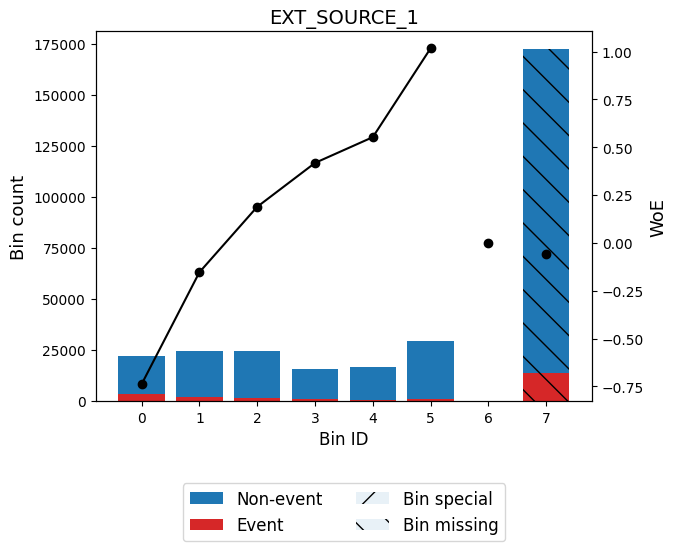

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.17829763
    IV (Jeffrey)             0.14792753
    JS (Jensen-Shannon)      0.01797294
    Hellinger                0.01822658
    Triangular               0.06998145
    KS                       0.08638578
    HHI                      0.35099123
    HHI (normalized)         0.25827569
    Cramer's V               0.15408740
    Quality score            0.42247611

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1   406.200220 2.461786e-90  1.000000 1.110223e-16
        1      2    99.948760 1.563912e-23  1.000000 1.110223e-16
        2      3    26.908415 2.133280e-07  1.000000 9.726545e-10
        3      4     6.840965 8.909070e-03  0.995862 4.137920e-03
        4      5    85.647156 2.150846e-20  1.00

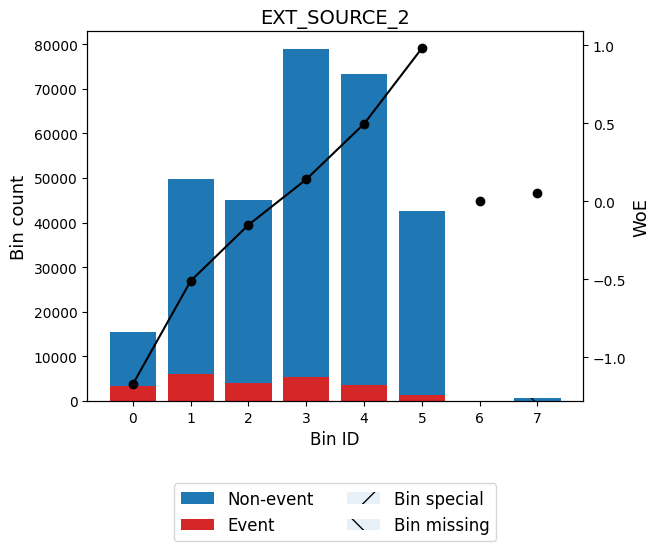

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.30240768
    IV (Jeffrey)             0.31243792
    JS (Jensen-Shannon)      0.03773149
    Hellinger                0.03837515
    Triangular               0.14616538
    KS                       0.22308862
    HHI                      0.19415911
    HHI (normalized)         0.07903898
    Cramer's V               0.15915470
    Quality score            0.87779204

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1   783.413301 2.179491e-172       1.0 1.110223e-16
        1      2   280.413816  6.101247e-63       1.0 1.110223e-16
        2      3   179.359094  6.688941e-41       1.0 1.110223e-16
        3      4   256.076932  1.229351e-57       1.0 1.110223e-16
        4      5   217.632418  2.970476e-49

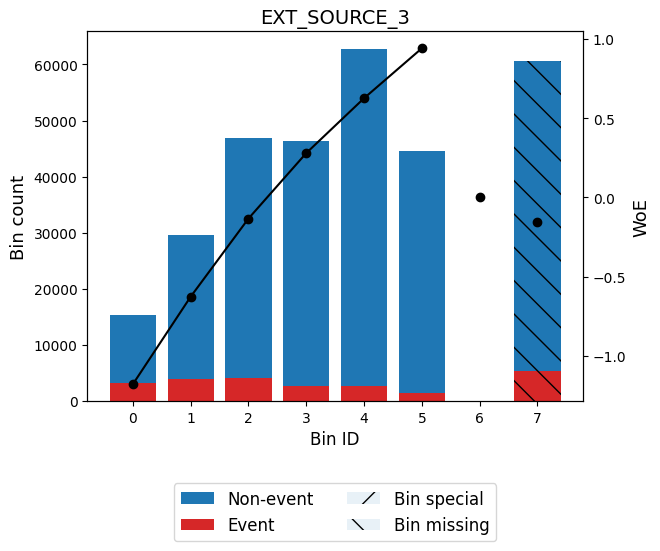

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.30992436
    IV (Jeffrey)             0.33107467
    JS (Jensen-Shannon)      0.04000085
    Hellinger                0.04067456
    Triangular               0.15500465
    KS                       0.19681209
    HHI                      0.16067554
    HHI (normalized)         0.04077205
    Cramer's V               0.18340026
    Quality score            0.93240694

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic       p-value  P[A > B]     P[B > A]
        0      1   455.695878 4.154817e-101       1.0 1.110223e-16
        1      2   441.028094  6.466867e-98       1.0 1.110223e-16
        2      3   262.288810  5.440244e-59       1.0 1.110223e-16
        3      4   155.151789  1.297249e-35       1.0 1.110223e-16
        4      5    88.651982  4.707548e-21

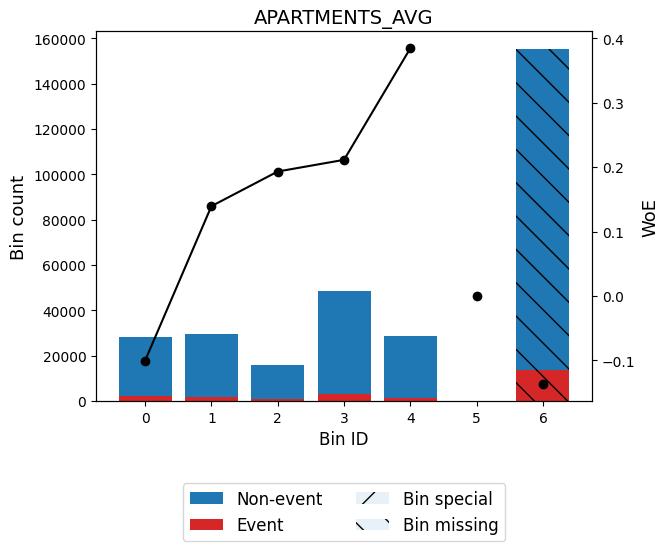

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.09087746
    IV (Jeffrey)             0.03281727
    JS (Jensen-Shannon)      0.00409015
    Hellinger                0.00409613
    Triangular               0.01631309
    KS                       0.07360739
    HHI                      0.31174007
    HHI (normalized)         0.19703008
    Cramer's V               0.03903741
    Quality score            0.03353391

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    57.651906 3.128597e-14  1.000000 1.110223e-16
        1      2     1.823031 1.769529e-01  0.912722 8.727777e-02
        2      3     0.235333 6.275975e-01  0.684127 3.158729e-01
        3      4    28.894313 7.643700e-08  1.000000 1.081158e-10



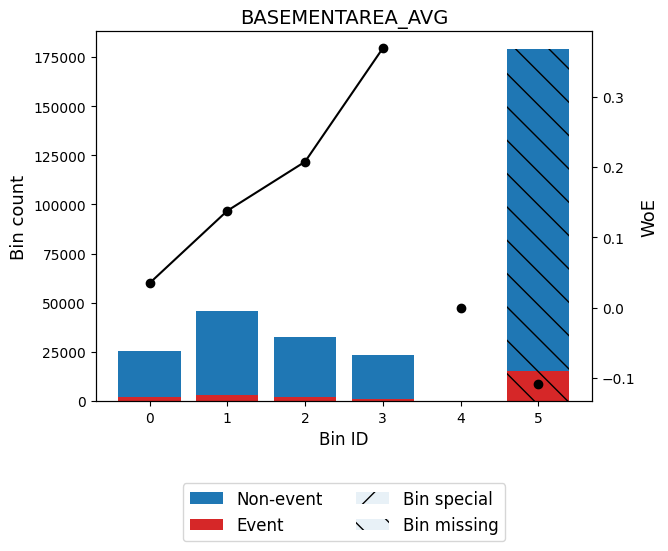

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07515161
    IV (Jeffrey)             0.02317500
    JS (Jensen-Shannon)      0.00288892
    Hellinger                0.00289289
    Triangular               0.01152421
    KS                       0.06669395
    HHI                      0.38848283
    HHI (normalized)         0.26617940
    Cramer's V               0.02597615
    Quality score            0.06941380

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1    11.521395 0.000688  0.999685 3.153067e-04
        1      2     5.603752 0.017922  0.991670 8.329621e-03
        2      3    19.333128 0.000011  0.999999 8.350789e-07



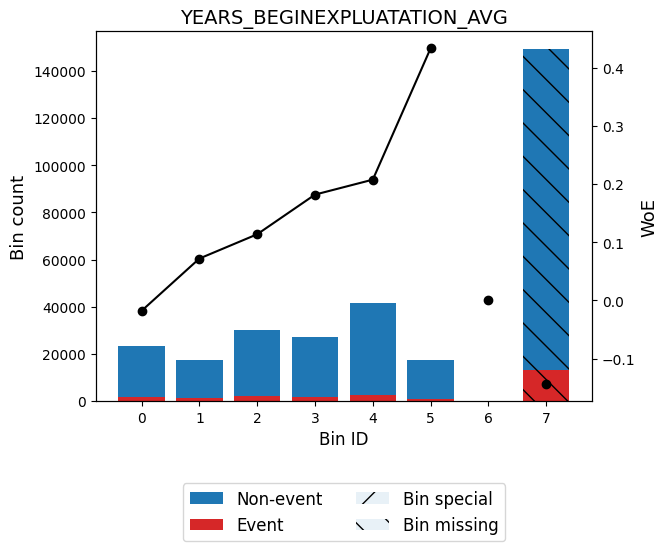

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08928920
    IV (Jeffrey)             0.02935549
    JS (Jensen-Shannon)      0.00365781
    Hellinger                0.00366360
    Triangular               0.01458541
    KS                       0.07472758
    HHI                      0.28594715
    HHI (normalized)         0.18393960
    Cramer's V               0.02941520
    Quality score            0.04007105

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     5.508549 1.892374e-02  0.991182 8.818155e-03
        1      2     1.259061 2.618290e-01  0.868323 1.316774e-01
        2      3     4.129524 4.214119e-02  0.979455 2.054457e-02
        3      4     0.651385 4.196179e-01  0.789582 2.104181e-01
        4      5    32.364131 1.278243e-08  1.00

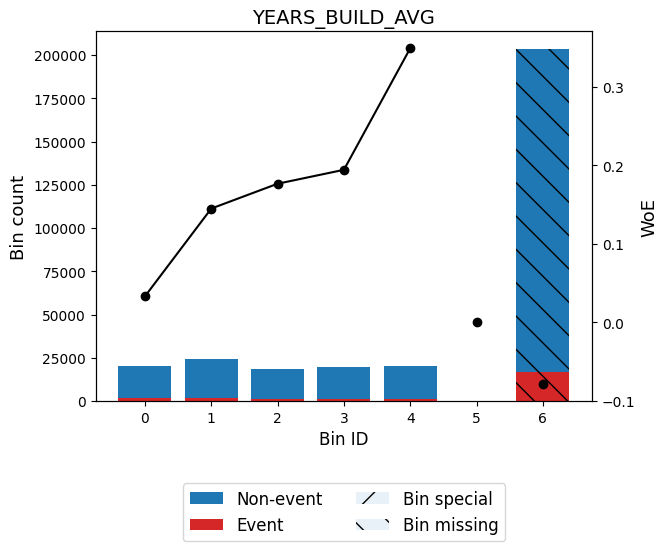

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05948960
    IV (Jeffrey)             0.01690710
    JS (Jensen-Shannon)      0.00210792
    Hellinger                0.00211064
    Triangular               0.00841000
    KS                       0.05428025
    HHI                      0.46456385
    HHI (normalized)         0.37532449
    Cramer's V               0.02466417
    Quality score            0.00828828

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     9.055440 0.002619  0.998843  0.001157
        1      2     0.640679 0.423465  0.788940  0.211060
        2      3     0.179224 0.672041  0.663878  0.336122
        3      4    13.426029 0.000248  0.999921  0.000079



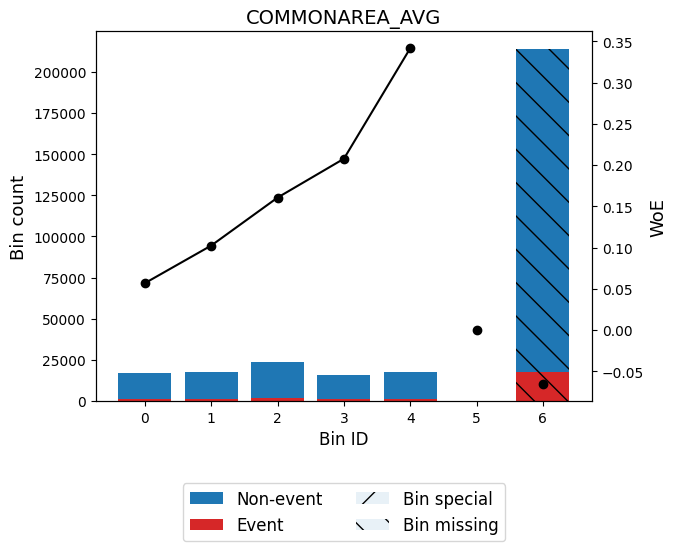

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05133309
    IV (Jeffrey)             0.01358189
    JS (Jensen-Shannon)      0.00169343
    Hellinger                0.00169558
    Triangular               0.00675670
    KS                       0.04731931
    HHI                      0.50658032
    HHI (normalized)         0.42434371
    Cramer's V               0.02296114
    Quality score            0.01505492

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     1.200151 0.273292  0.863489  0.136511
        1      2     2.187292 0.139154  0.930264  0.069736
        2      3     1.279913 0.257915  0.872011  0.127989
        3      4     8.362083 0.003831  0.998299  0.001701



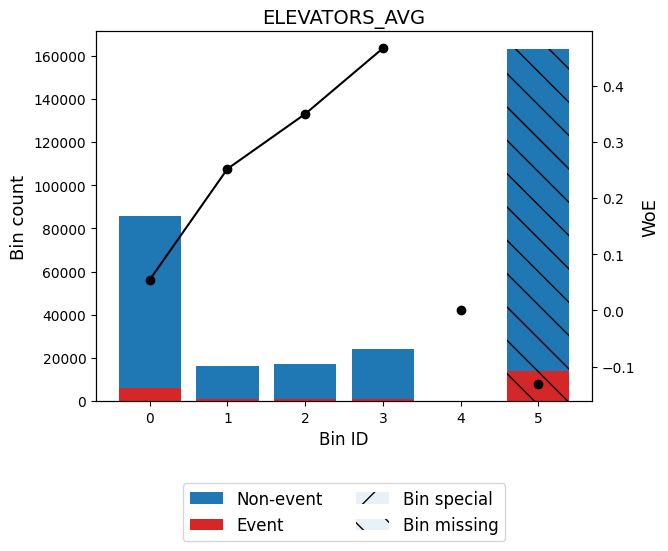

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08894903
    IV (Jeffrey)             0.03352403
    JS (Jensen-Shannon)      0.00416914
    Hellinger                0.00417977
    Triangular               0.01659264
    KS                       0.07398387
    HHI                      0.37396193
    HHI (normalized)         0.24875432
    Cramer's V               0.03854537
    Quality score            0.09982307

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    31.534146 1.959638e-08  1.000000 1.110223e-16
        1      2     4.371654 3.654151e-02  0.982131 1.786859e-02
        2      3     6.825433 8.986878e-03  0.995643 4.357162e-03



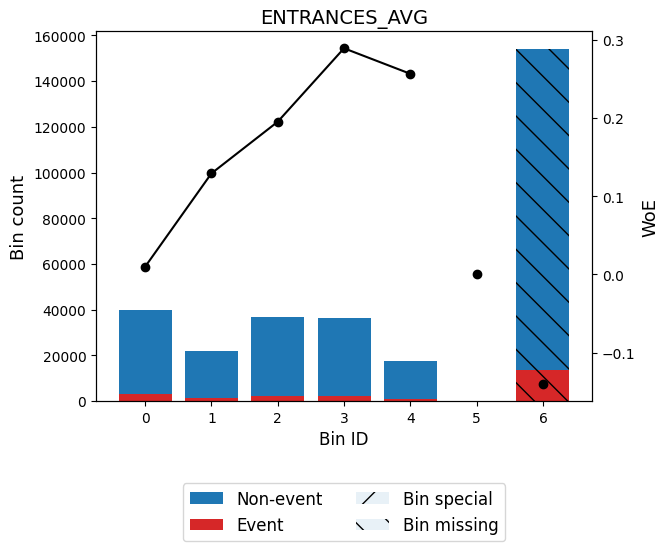

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08775917
    IV (Jeffrey)             0.02798850
    JS (Jensen-Shannon)      0.00349162
    Hellinger                0.00349508
    Triangular               0.01393886
    KS                       0.07498641
    HHI                      0.30677768
    HHI (normalized)         0.19124063
    Cramer's V               0.02685486
    Quality score            0.05318077

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1    13.292264 0.000267  0.999954  0.000046
        1      2     3.737714 0.053197  0.973307  0.026693
        2      3     9.224777 0.002388  0.999007  0.000993
        3      4     0.704379 0.401316  0.202132  0.797868



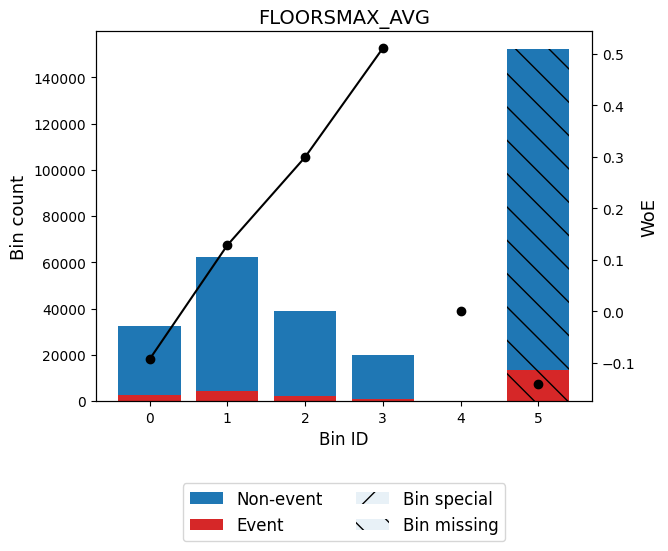

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.09697841
    IV (Jeffrey)             0.03863892
    JS (Jensen-Shannon)      0.00480526
    Hellinger                0.00481750
    Triangular               0.01912471
    KS                       0.07498335
    HHI                      0.32048071
    HHI (normalized)         0.18457685
    Cramer's V               0.04554636
    Quality score            0.13064008

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    75.298118 4.047453e-18       1.0 1.110223e-16
        1      2    40.639385 1.830791e-10       1.0 4.440892e-15
        2      3    28.597371 8.910307e-08       1.0 3.913958e-11



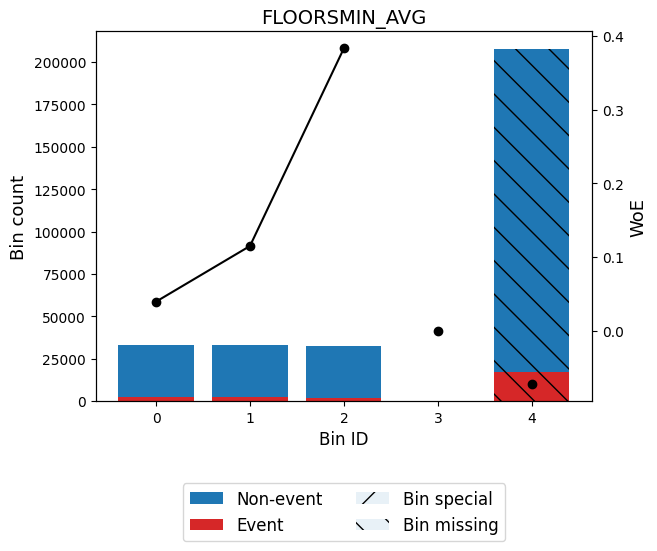

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05725894
    IV (Jeffrey)             0.01848194
    JS (Jensen-Shannon)      0.00229996
    Hellinger                0.00230508
    Triangular               0.00915928
    KS                       0.05066565
    HHI                      0.49453943
    HHI (normalized)         0.36817429
    Cramer's V               0.03492554
    Quality score            0.04798535

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     6.226224 1.258719e-02  0.994085 5.915377e-03
        1      2    66.951662 2.782467e-16  1.000000 1.110223e-16



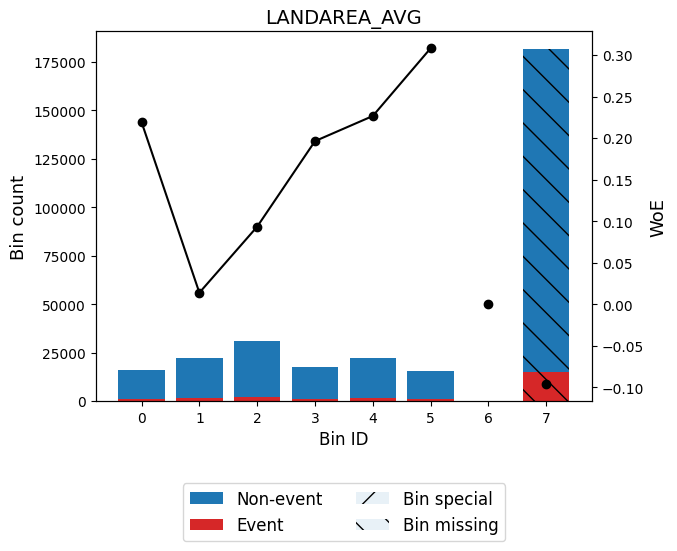

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.06713008
    IV (Jeffrey)             0.01848065
    JS (Jensen-Shannon)      0.00230583
    Hellinger                0.00230795
    Triangular               0.00920641
    KS                       0.05947442
    HHI                      0.38166290
    HHI (normalized)         0.29332903
    Cramer's V               0.02380352
    Quality score            0.02630513

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1    24.855295 6.179906e-07 8.509281e-08  1.000000
        1      2     5.563582 1.833786e-02 9.909973e-01  0.009003
        2      3     7.301677 6.889027e-03 9.972007e-01  0.002799
        3      4     0.526669 4.680109e-01 7.655487e-01  0.234451
        4      5     3.360161 6.679156e-02 9.674

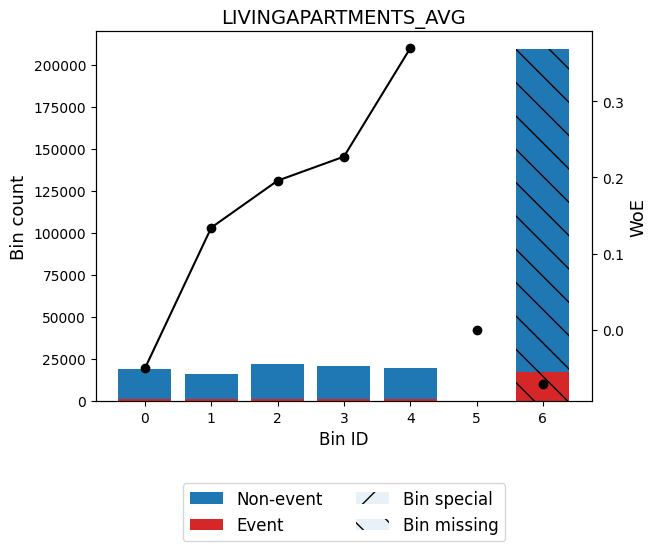

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05701396
    IV (Jeffrey)             0.01788929
    JS (Jensen-Shannon)      0.00222930
    Hellinger                0.00223272
    Triangular               0.00889009
    KS                       0.05054579
    HHI                      0.48724020
    HHI (normalized)         0.40178024
    Cramer's V               0.03444416
    Quality score            0.02179123

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1    19.950249 0.000008  0.999999 7.501643e-07
        1      2     2.150563 0.142518  0.928523 7.147669e-02
        2      3     0.625659 0.428952  0.785730 2.142699e-01
        3      4    11.170533 0.000831  0.999703 2.973265e-04



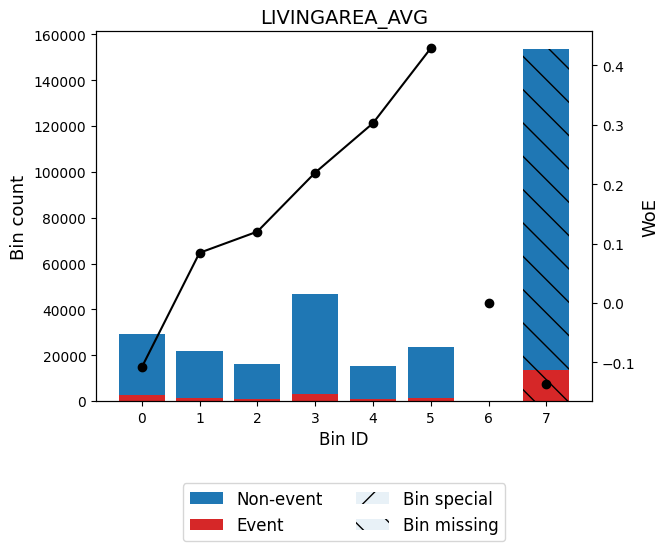

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.09331557
    IV (Jeffrey)             0.03496571
    JS (Jensen-Shannon)      0.00435470
    Hellinger                0.00436268
    Triangular               0.01735565
    KS                       0.07265811
    HHI                      0.30022495
    HHI (normalized)         0.20025709
    Cramer's V               0.04304659
    Quality score            0.06815320

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    32.576210 1.146090e-08  1.000000 2.602907e-11
        1      2     0.758490 3.838016e-01  0.808843 1.911566e-01
        2      3     7.338618 6.748870e-03  0.996481 3.519157e-03
        3      4     4.435346 3.520208e-02  0.983665 1.633494e-02
        4      5     7.729387 5.432919e-03  0.99

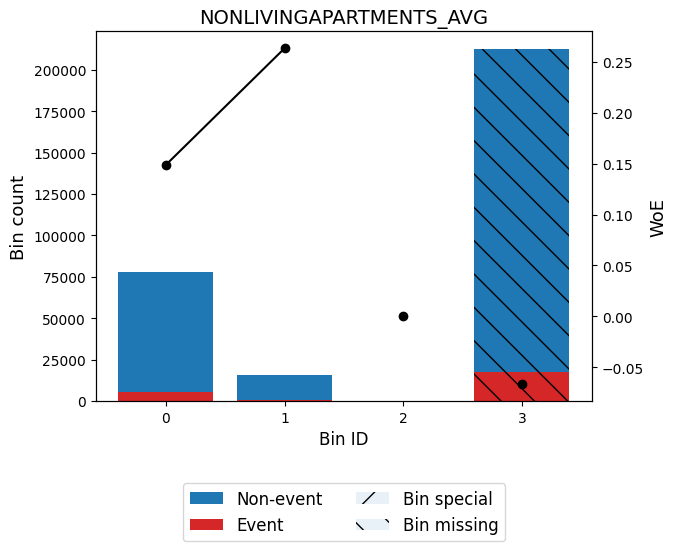

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.04883088
    IV (Jeffrey)             0.01161818
    JS (Jensen-Shannon)      0.00145046
    Hellinger                0.00145136
    Triangular               0.00579462
    KS                       0.04759369
    HHI                      0.54957119
    HHI (normalized)         0.39942825
    Cramer's V               0.01018198
    Quality score            0.02900390

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1      9.70698 0.001836  0.999745  0.000255



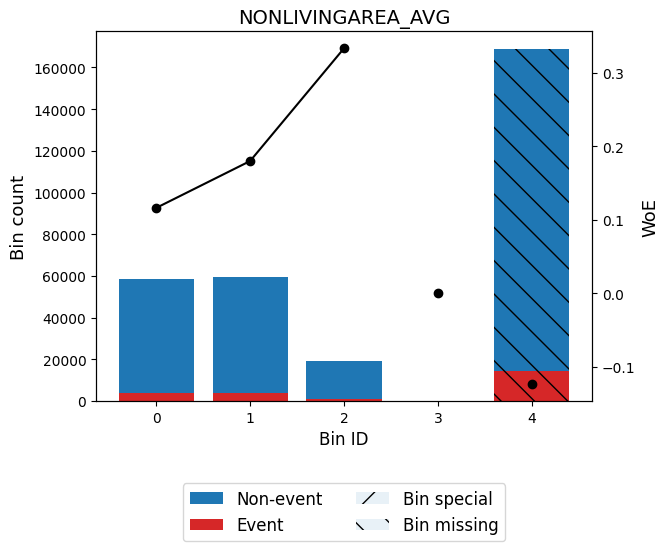

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07753237
    IV (Jeffrey)             0.02322902
    JS (Jensen-Shannon)      0.00289827
    Hellinger                0.00290095
    Triangular               0.01157186
    KS                       0.07178281
    HHI                      0.38242335
    HHI (normalized)         0.22802918
    Cramer's V               0.01676644
    Quality score            0.07411074

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1     7.469073 0.006277  0.997153 2.846742e-03
        1      2    18.776936 0.000015  1.000000 5.745623e-08



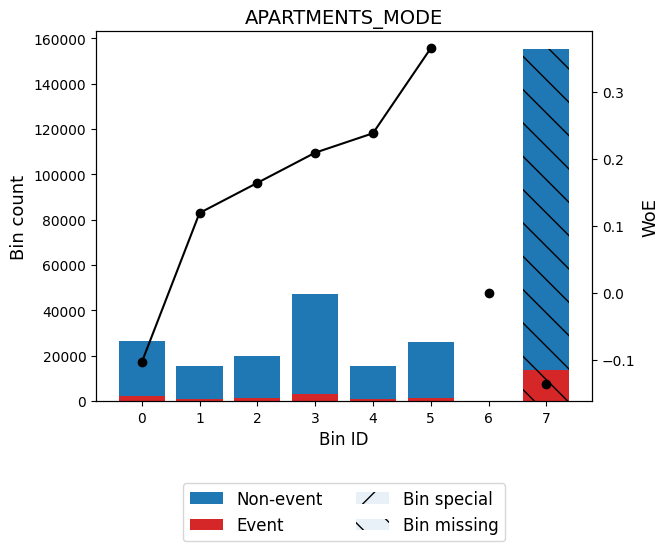

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.09017295
    IV (Jeffrey)             0.03195726
    JS (Jensen-Shannon)      0.00398442
    Hellinger                0.00398953
    Triangular               0.01589712
    KS                       0.07360739
    HHI                      0.30523498
    HHI (normalized)         0.20598283
    Cramer's V               0.03770141
    Quality score            0.03332715

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1    33.251740 8.096729e-09  1.000000 1.448841e-12
        1      2     1.109072 2.922837e-01  0.853498 1.465023e-01
        2      3     1.736462 1.875878e-01  0.905213 9.478730e-02
        3      4     0.575284 4.481667e-01  0.778102 2.218984e-01
        4      5     8.722150 3.143671e-03  0.99

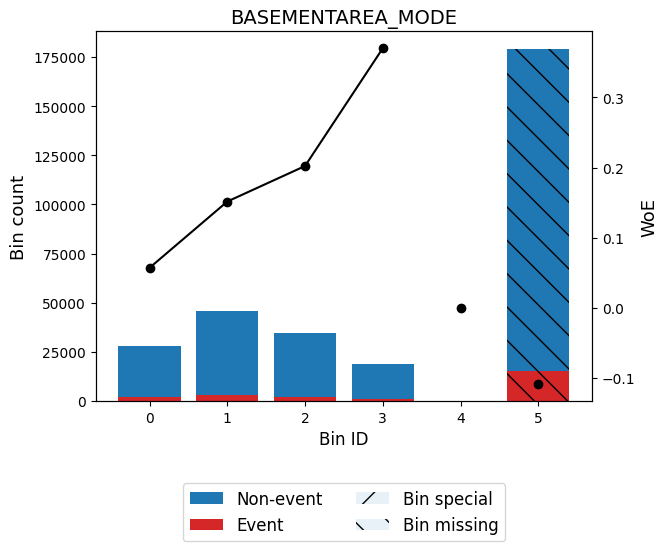

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.07390317
    IV (Jeffrey)             0.02217231
    JS (Jensen-Shannon)      0.00276474
    Hellinger                0.00276813
    Triangular               0.01103203
    KS                       0.06669395
    HHI                      0.38940310
    HHI (normalized)         0.26728372
    Cramer's V               0.02273929
    Quality score            0.06209666

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]     P[B > A]
        0      1    10.141788 0.001449  0.999332 6.678024e-04
        1      2     3.069823 0.079758  0.960736 3.926434e-02
        2      3    18.444544 0.000017  0.999999 6.739393e-07



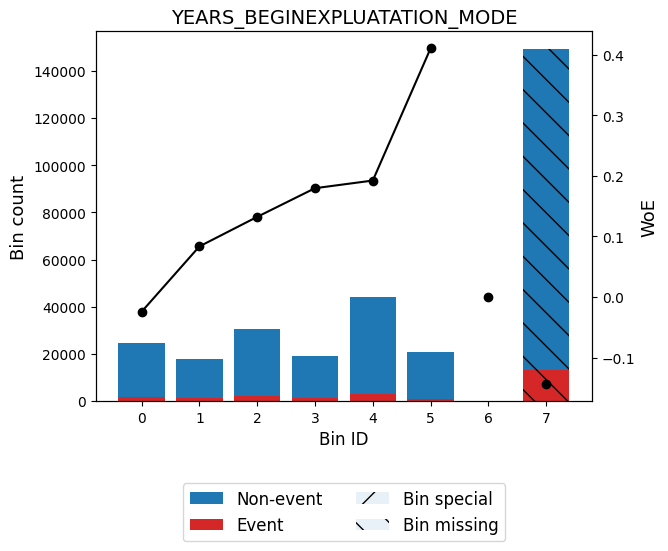

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.08916364
    IV (Jeffrey)             0.02933506
    JS (Jensen-Shannon)      0.00365585
    Hellinger                0.00366135
    Triangular               0.01457987
    KS                       0.07472758
    HHI                      0.28675316
    HHI (normalized)         0.18486076
    Cramer's V               0.02949907
    Quality score            0.01800846

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.240779 4.095955e-03  0.998344 1.655599e-03
        1      2     1.744938 1.865144e-01  0.906156 9.384418e-02
        2      3     1.618862 2.032505e-01  0.899323 1.006771e-01
        3      4     0.129277 7.191832e-01  0.638860 3.611398e-01
        4      5    35.582579 2.444641e-09  1.00

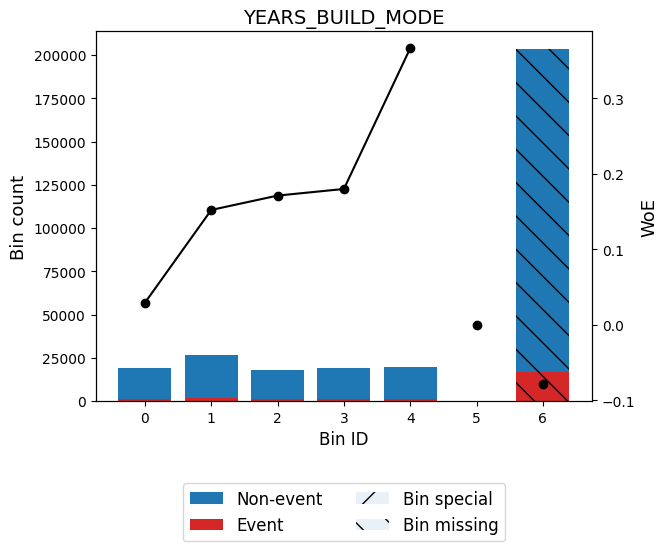

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05946153
    IV (Jeffrey)             0.01714332
    JS (Jensen-Shannon)      0.00213682
    Hellinger                0.00213986
    Triangular               0.00852319
    KS                       0.05428025
    HHI                      0.46484924
    HHI (normalized)         0.37565745
    Cramer's V               0.02545589
    Quality score            0.00275556

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1    11.084666 0.000870  0.999628  0.000372
        1      2     0.238290 0.625444  0.688166  0.311834
        2      3     0.043537 0.834717  0.582491  0.417509
        3      4    18.988187 0.000013  0.999998  0.000002



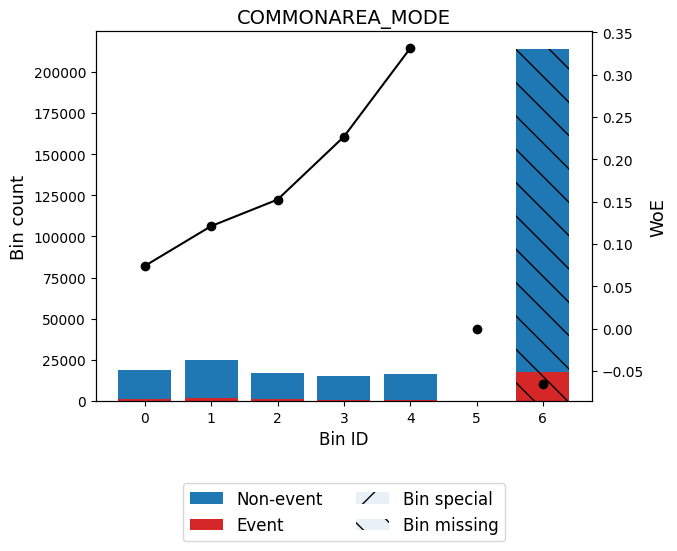

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.05096509
    IV (Jeffrey)             0.01319603
    JS (Jensen-Shannon)      0.00164568
    Hellinger                0.00164759
    Triangular               0.00656758
    KS                       0.04731931
    HHI                      0.50679888
    HHI (normalized)         0.42459870
    Cramer's V               0.02108152
    Quality score            0.01232247

  Monotonic trend            descending

  Significance tests

    Bin A  Bin B  t-statistic  p-value  P[A > B]  P[B > A]
        0      1     1.554501 0.212472  0.893525  0.106475
        1      2     0.617086 0.432132  0.784864  0.215136
        2      3     2.659053 0.102962  0.949028  0.050972
        3      4     4.800242 0.028456  0.986155  0.013845



In [15]:
for variable in float_columns:
    optb = binning_process.get_binned_variable(name=variable)
    optb.binning_table.build()
    optb.binning_table.plot()
    optb.binning_table.analysis()

In [16]:
# Exécutez le binning
binning_table = binning_process.fit_transform(sous_data[float_columns].values, sous_data['TARGET'].values)

# Obtenez les points de coupure pour chaque variable
breakpoints_dict = {}
for col in float_columns:
    # Obtenez les points de coupure à partir de la spécification de binning
    binning_spec = binning_process.get_binned_variable(col) # Return optimal binning object for a given variable name
    # breakpoints = binning_spec.binning_table.build()['breakpoints']
    # breakpoints_dict[col] = breakpoints
    print(binning_spec)

# # Afficher les points de coupure
# for col, breakpoints in breakpoints_dict.items():
#     print(f"Points de coupure pour {col}: {breakpoints}")

OptimalBinning(max_n_bins=6, name='EXT_SOURCE_1')
OptimalBinning(max_n_bins=6, name='EXT_SOURCE_2')
OptimalBinning(max_n_bins=6, name='EXT_SOURCE_3')
OptimalBinning(max_n_bins=6, name='APARTMENTS_AVG')
OptimalBinning(max_n_bins=6, name='BASEMENTAREA_AVG')
OptimalBinning(max_n_bins=6, name='YEARS_BEGINEXPLUATATION_AVG')
OptimalBinning(max_n_bins=6, name='YEARS_BUILD_AVG')
OptimalBinning(max_n_bins=6, name='COMMONAREA_AVG')
OptimalBinning(max_n_bins=6, name='ELEVATORS_AVG')
OptimalBinning(max_n_bins=6, name='ENTRANCES_AVG')
OptimalBinning(max_n_bins=6, name='FLOORSMAX_AVG')
OptimalBinning(max_n_bins=6, name='FLOORSMIN_AVG')
OptimalBinning(max_n_bins=6, name='LANDAREA_AVG')
OptimalBinning(max_n_bins=6, name='LIVINGAPARTMENTS_AVG')
OptimalBinning(max_n_bins=6, name='LIVINGAREA_AVG')
OptimalBinning(max_n_bins=6, name='NONLIVINGAPARTMENTS_AVG')
OptimalBinning(max_n_bins=6, name='NONLIVINGAREA_AVG')
OptimalBinning(max_n_bins=6, name='APARTMENTS_MODE')
OptimalBinning(max_n_bins=6, name='BASEME

In [18]:
# Créer une fonction pour calculer la stabilité de l'impact sur la cible
def calculate_stability(column):
    stability_df = binning_df.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    # Calcul de la stabilité pour chaque combinaison de 'date' et de la var disctétisée spécifiée 'column'
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df

# Tracer la stabilité de l'impact sur la cible au fil du temps avec Plotly
for column in float_columns:
    stability_df = calculate_stability(f"{column}_BIN")  # Utilisez la colonne discrétisée
    
    # Créer un graphique en barres empilées avec Plotly
    fig = go.Figure()
    
    for class_label in stability_df.columns[:-1]:
        fig.add_trace(go.Scatter(x=stability_df.index, y=stability_df[class_label],
                                 mode='lines+markers', name=f'Classe {class_label}'))
    
    # Ajouter une annotation pour le maximum de stabilité
    max_stability_date = stability_df['stability'].idxmax()
    max_stability_value = stability_df['stability'].max()
    fig.add_annotation(text=f'Max Stability\nDate: {max_stability_date}\nValue: {max_stability_value:.2f}',
                       x=max_stability_date, y=max_stability_value + 0.1, showarrow=True,
                       arrowhead=2, arrowcolor='red', ax=0, ay=-40)
    
    # Personnaliser la mise en page
    fig.update_layout(title=f'Stabilité de l\'impact sur la cible pour {column}',
                      xaxis_title='Date',
                      yaxis_title='Proportion de la cible (TARGET)',
                      legend_title=f'Classes de {column}_BIN',
                      barmode='stack') # pour empiler les lignes les unes sur les autres pour chaque date
    
    # Afficher le graphique interactif
    fig.show()


1. Identifiez les périodes où la stabilité fluctue ou présente des modèles particuliers.</div>
2. Identifier  les catégories de la variable les plus stables >>> elles sont considérées comme robustes et moins sensibles aux variations temporelles </div>
3. Corrélation avec d'autres variables : Explorez la corrélation entre la stabilité de l'impact sur la cible et d'autres variables non discrétisées. Cela peut vous aider à comprendre si des facteurs externes influent sur la stabilité.</div>
4. Évaluation des performances du modèle : Intégrez ces variables discrétisées dans votre modèle de machine learning et évaluez les performances du modèle. Assurez-vous de surveiller la stabilité des résultats sur un ensemble de validation ou de test.</div>
5. Réajuster le nbre de classes de discrétisation si nécessaire, d'ajuster les points de coupure ou même de réévaluer la nécessité de la discrétisation pour certaines variables.</div>


# var catégorielles 

In [19]:
for col in obj_columns:
    print(f"{col} : {sous_data[col].nunique()}")

ORGANIZATION_TYPE : 58


#### Impact encoding

Pour les variables qu'on ne peut pas OHE en raison de leur nombre de modalités

In [20]:
impact_dicts = {}
categorical_columns = sous_data.select_dtypes(include = 'object')

for categorical_feature in ['ORGANIZATION_TYPE'] :

    category_means = sous_data.groupby(categorical_feature)['TARGET'].mean()
    category_impacts = category_means - category_means.mean()

    impact_dicts[categorical_feature] = category_impacts.to_dict()

    sous_data['encoded_' + categorical_feature] = sous_data[categorical_feature].map(impact_dicts[categorical_feature])
    sous_data.drop(columns= categorical_feature, inplace=True)   

C:\Users\jinzhou\AppData\Local\Temp\ipykernel_5648\2246525348.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jinzhou\AppData\Local\Temp\ipykernel_5648\2246525348.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# variables indicatrices

In [21]:
for col in int_columns:
    print(f"{col} : {sous_data[col].nunique()}")

# "HOUR_APPR_PROCESS_START" : Label encoding 

HOUR_APPR_PROCESS_START : 24
REG_REGION_NOT_LIVE_REGION : 2
REG_REGION_NOT_WORK_REGION : 2
LIVE_REGION_NOT_WORK_REGION : 2
REG_CITY_NOT_LIVE_CITY : 2
REG_CITY_NOT_WORK_CITY : 2
LIVE_CITY_NOT_WORK_CITY : 2
TARGET : 2


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer un label encoder
label_encoder = LabelEncoder()

# Appliquer le label encoding à la variable "HOUR_APPR_PROCESS_START"
sous_data['HOUR_APPR_PROCESS_START'] = label_encoder.fit_transform(sous_data['HOUR_APPR_PROCESS_START'])

### OHE

In [ ]:
int_columns = int_columns.drop("HOUR_APPR_PROCESS_START")

# Sélectionnez uniquement les colonnes de votre liste dans le DataFrame
selected_columns = sous_data[int_columns]

# Effectuez le codage one-hot
sous_data_encoded = pd.get_dummies(selected_columns, columns=int_columns, drop_first=True)

# Concaténez le DataFrame encodé avec le reste du DataFrame original
sous_data = pd.concat([sous_data.drop(columns=selected_columns.columns), sous_data_encoded], axis=1)